# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [122]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [123]:
base_url="http://api.openweathermap.org/data/2.5/weather?q="  

num=1         
Cloudiness=[]    
Country=[]       
Date=[]         
Humidity=[]      
Lat=[]           
Lng=[]           
Max_Temp=[]      
Wind_Speed=[]    
cit=[]
for city in cities:  
    try:
        url=base_url+city+'&appid='+weather_api_key
        response=requests.get(url).json()
        
        Lat.append(response['coord']['lat'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Humidity.append(response['main']['humidity'])
        Lng.append(response['coord']['lon'])
        Date.append(response['dt'])         
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        cit.append(city)
        print(f'Processing Record {num} | {city}')
        num=num+1
    
    except (KeyError, IndexError):
        print("City not found. Skipping...")

Processing Record 1 | klaksvik
Processing Record 2 | sinnamary
Processing Record 3 | saint george
Processing Record 4 | ignatovka
Processing Record 5 | hermanus
Processing Record 6 | mar del plata
Processing Record 7 | cape town
Processing Record 8 | port alfred
City not found. Skipping...
Processing Record 9 | shahreza
Processing Record 10 | talnakh
Processing Record 11 | kapaa
Processing Record 12 | tuktoyaktuk
Processing Record 13 | ushuaia
City not found. Skipping...
Processing Record 14 | bethel
Processing Record 15 | rikitea
Processing Record 16 | albany
Processing Record 17 | mgandu
Processing Record 18 | shanghai
Processing Record 19 | hilo
Processing Record 20 | xai-xai
Processing Record 21 | mataura
City not found. Skipping...
Processing Record 22 | uniontown
Processing Record 23 | muros
Processing Record 24 | omsukchan
City not found. Skipping...
Processing Record 25 | ilulissat
Processing Record 26 | bathsheba
Processing Record 27 | ust-omchug
Processing Record 28 | touros


Processing Record 238 | port elizabeth
Processing Record 239 | yellowknife
Processing Record 240 | kysyl-syr
Processing Record 241 | tiksi
Processing Record 242 | noumea
Processing Record 243 | marang
Processing Record 244 | buderim
Processing Record 245 | bud
Processing Record 246 | numbrecht
City not found. Skipping...
Processing Record 247 | lakes entrance
Processing Record 248 | sitka
Processing Record 249 | bereznik
Processing Record 250 | ust-kan
Processing Record 251 | san patricio
Processing Record 252 | mattru
Processing Record 253 | marakkanam
Processing Record 254 | onega
Processing Record 255 | vestmanna
Processing Record 256 | axim
Processing Record 257 | bundaberg
City not found. Skipping...
Processing Record 258 | erzin
City not found. Skipping...
Processing Record 259 | qunduz
Processing Record 260 | katsuura
Processing Record 261 | port hardy
Processing Record 262 | fortuna
Processing Record 263 | phan thiet
Processing Record 264 | moose factory
Processing Record 265 |

Processing Record 466 | myanaung
Processing Record 467 | vila franca do campo
Processing Record 468 | frasin
Processing Record 469 | skibbereen
Processing Record 470 | yumen
Processing Record 471 | labuhan
Processing Record 472 | paita
Processing Record 473 | nacala
Processing Record 474 | taua
Processing Record 475 | saint andrews
Processing Record 476 | pangnirtung
Processing Record 477 | les escoumins
Processing Record 478 | achacachi
Processing Record 479 | peniche
Processing Record 480 | pailitas
Processing Record 481 | maragogi
Processing Record 482 | goderich
Processing Record 483 | tateyama
City not found. Skipping...
Processing Record 484 | saint-georges
Processing Record 485 | ballaghaderreen
Processing Record 486 | douglas
Processing Record 487 | lasa
Processing Record 488 | bubaque
Processing Record 489 | mollendo
Processing Record 490 | canarana
Processing Record 491 | mount gambier
Processing Record 492 | tevaitoa
Processing Record 493 | san fernando
Processing Record 494

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [141]:
final=pd.DataFrame({'City':cit,'Cloudiness':Cloudiness,'Country':Country,'Date':Date,'Humidity':Humidity,'Lat':Lat,'Lng':Lng,'Max Temp':Max_Temp,'Wind Speed':Wind_Speed})
final.to_csv("final_weather_data.csv",header=True, index=False)

In [125]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        557 non-null    object 
 1   Cloudiness  557 non-null    int64  
 2   Country     557 non-null    object 
 3   Date        557 non-null    int64  
 4   Humidity    557 non-null    int64  
 5   Lat         557 non-null    float64
 6   Lng         557 non-null    float64
 7   Max Temp    557 non-null    float64
 8   Wind Speed  557 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.3+ KB


In [126]:
final.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,klaksvik,100,FO,1584721394,69,62.23,-6.59,277.15,7.70
1,sinnamary,98,GF,1584721394,76,5.38,-52.95,299.90,4.88
2,saint george,90,US,1584721311,87,37.10,-113.58,279.26,2.10
3,ignatovka,42,RU,1584721395,76,53.95,47.65,275.31,4.90
4,hermanus,0,ZA,1584721395,81,-34.42,19.23,293.71,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

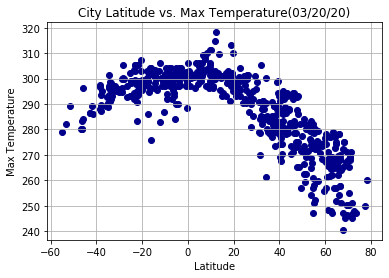


      We could conclude that more close to equator higher temperature;
      The northern hesispere colder than southern when with same level of Latitude
      


In [127]:
Latitude = final.Lat
Temperature = final['Max Temp']
plt.scatter(Latitude,Temperature,c='darkblue')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title('City Latitude vs. Max Temperature(03/20/20)')
plt.grid()
plt.show()
print('''
      We could conclude that more close to equator higher temperature;
      The northern hesispere colder than southern when with same level of Latitude
      ''')

#### Latitude vs. Humidity Plot

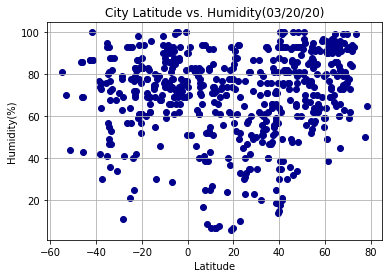


      The northern and southern hesispere with simliar humidity;
      Majority cities humidity between 70-90;
      Not too strong relationshiop between humidity and latitude
      


In [128]:
Latitude = final.Lat
Humidity = final.Humidity
plt.scatter(Latitude,Humidity,c='darkblue')
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title('City Latitude vs. Humidity(03/20/20)')
plt.grid()
plt.show()
print('''
      The northern and southern hesispere with simliar humidity;
      Majority cities humidity between 70-90;
      Not too strong relationshiop between humidity and latitude
      ''')

#### Latitude vs. Cloudiness Plot

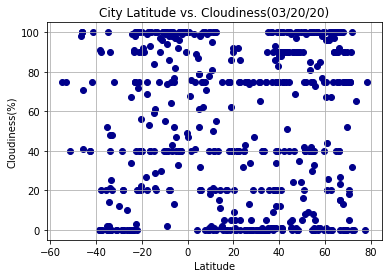


      The northern and southern hesispere with simliar cloudeiness;
      Not too strong relationshiop between cloudeiness and latitude
      


In [129]:
Latitude = final.Lat
Cloudiness = final.Cloudiness
plt.scatter(Latitude,Cloudiness,c='darkblue')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title('City Latitude vs. Cloudiness(03/20/20)')
plt.grid()
plt.show()
print('''
      The northern and southern hesispere with simliar cloudeiness;
      Not too strong relationshiop between cloudeiness and latitude
      ''')

#### Latitude vs. Wind Speed Plot

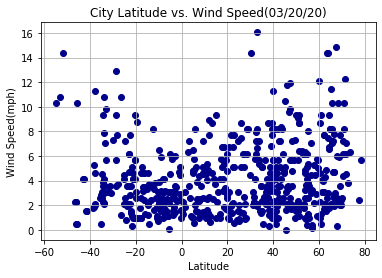


      The northern and southern hesispere with simliar wind speed when they are in same latitude;
      Majority cities wind speed  between 0-5;
      The cities far from equator with higher wind speed
      


In [130]:
Latitude = final.Lat
Wind_Speed = final['Wind Speed']
plt.scatter(Latitude,Wind_Speed,c='darkblue')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title('City Latitude vs. Wind Speed(03/20/20)')
plt.grid()
plt.show()
print('''
      The northern and southern hesispere with simliar wind speed when they are in same latitude;
      Majority cities wind speed  between 0-5;
      The cities far from equator with higher wind speed
      ''')

## Linear Regression

In [131]:
# Create Northern and Southern Hemisphere DataFrames
Northern=final.loc[final['Lat']>= 0]
Southern=final.loc[final['Lat']< 0]
Southern.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,hermanus,0,ZA,1584721395,81,-34.42,19.23,293.71,2.24
5,mar del plata,20,AR,1584721262,64,-38.00,-57.56,293.71,4.60
6,cape town,40,ZA,1584720848,68,-33.93,18.42,295.93,4.10
7,port alfred,25,ZA,1584721395,88,-33.59,26.89,292.59,3.58
12,ushuaia,75,AR,1584721384,81,-54.80,-68.30,279.15,10.30


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8704862938773731


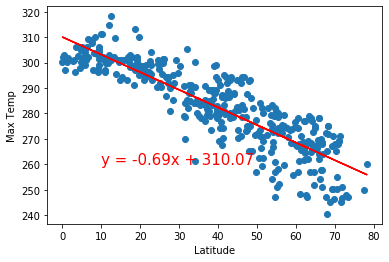


      For northern,Latitude and Max Tem shows negative relationship;
      high r squared value, it's a good module;
      


In [132]:
x_values = Northern['Lat']
y_values = Northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,260),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
print('''
      For northern,Latitude and Max Tem shows negative relationship;
      high r squared value, it's a good module;
      ''')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5399400766051832


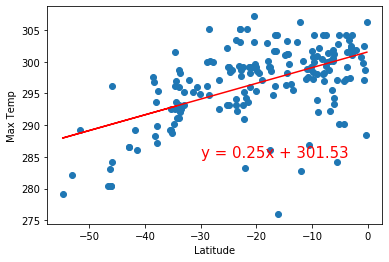


      For southern, Latitude and Max Tem shows positive relationship;
      r squared value is > 0.5, it's not a best but ok module;
      


In [134]:
x_values = Southern['Lat']
y_values = Southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,285),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
print('''
      For southern, Latitude and Max Tem shows positive relationship;
      r squared value is > 0.5, it's not a best but ok module;
      ''')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3320421829363915


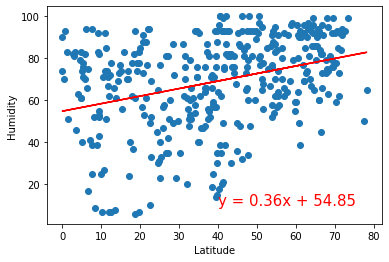


      For northern, Latitude and humidity shows positive relationship;
      r squared value is low, it's not a good module;
      


In [135]:
x_values = Northern['Lat']
y_values = Northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
print('''
      For northern, Latitude and humidity shows positive relationship;
      r squared value is low, it's not a good module;
      ''')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17753932073620965


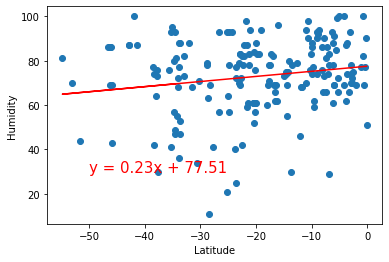


      For southern, Latitude and humidity shows positive relationship;
      r squared value is low, it's not a good module;
      


In [136]:
x_values = Southern['Lat']
y_values = Southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
print('''
      For southern, Latitude and humidity shows positive relationship;
      r squared value is low, it's not a good module;
      ''')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13102918393925372


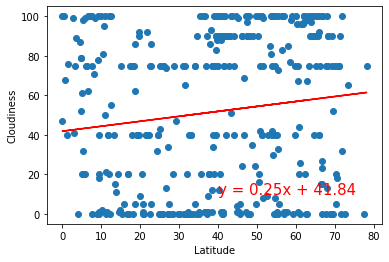


      For northern, Latitude and cloudiness shows positive relationship;
      r squared value is low, it's not a good module;
      Not too much relationship bettween them
      


In [137]:
x_values = Northern['Lat']
y_values = Northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
print('''
      For northern, Latitude and cloudiness shows positive relationship;
      r squared value is low, it's not a good module;
      Not too much relationship bettween them
      ''')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3707329133068687


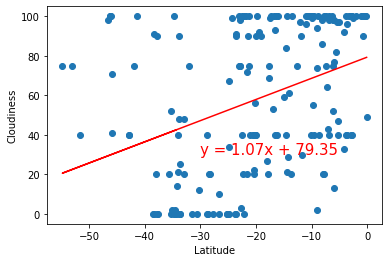


      For southern, Latitude and clodiness shows positive relationship;
      r squared value is low, it's not a good module;
      


In [138]:
x_values = Southern['Lat']
y_values = Southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
print('''
      For southern, Latitude and clodiness shows positive relationship;
      r squared value is low, it's not a good module;
      ''')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.18811242455651667


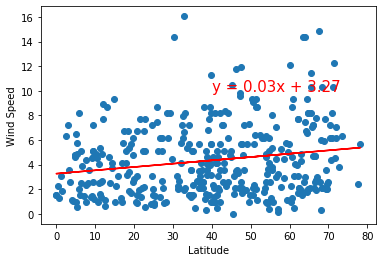


      For northern, Latitude and wind speed shows not strong positive relationship;
      r squared value is low, it's not a good module;
      


In [139]:
x_values = Northern['Lat']
y_values = Northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()
print('''
      For northern, Latitude and wind speed shows not strong positive relationship;
      r squared value is low, it's not a good module;
      ''')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3280977113135381


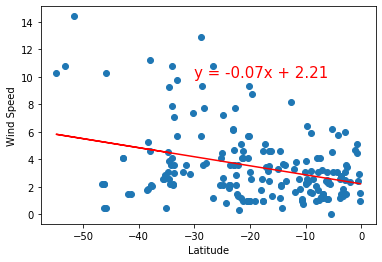


      For southern, Latitude and wind speed shows negtive relationship;
      r squared value is low, it's not a good module;
      


In [140]:
x_values = Southern['Lat']
y_values = Southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue}")
plt.show()
print('''
      For southern, Latitude and wind speed shows negtive relationship;
      r squared value is low, it's not a good module;
      ''')